a0 is -11.34 ± 0.04
a1 is 0.27 ± 0.00
        χ2 is 18464.1811563 
Reduced χ2 is 68.3858561345
The fit is not very good.


Bootstrapped a0 is -11.271 ± 1.036
Bootstrapped a1 is 0.266 ± 0.023
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 2

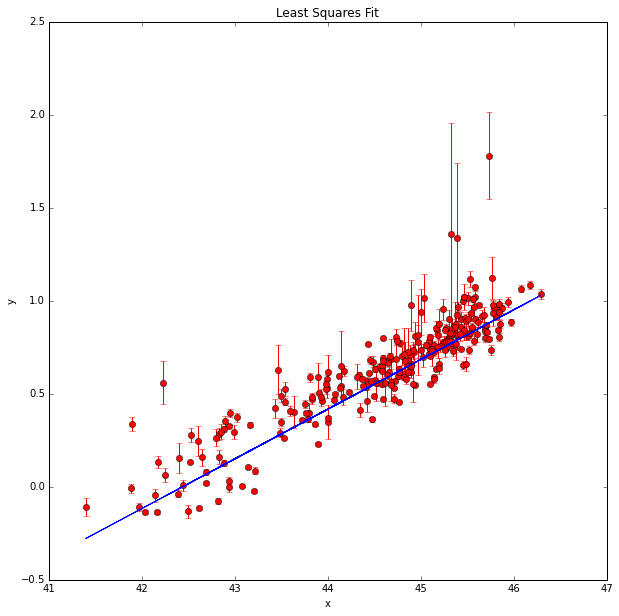

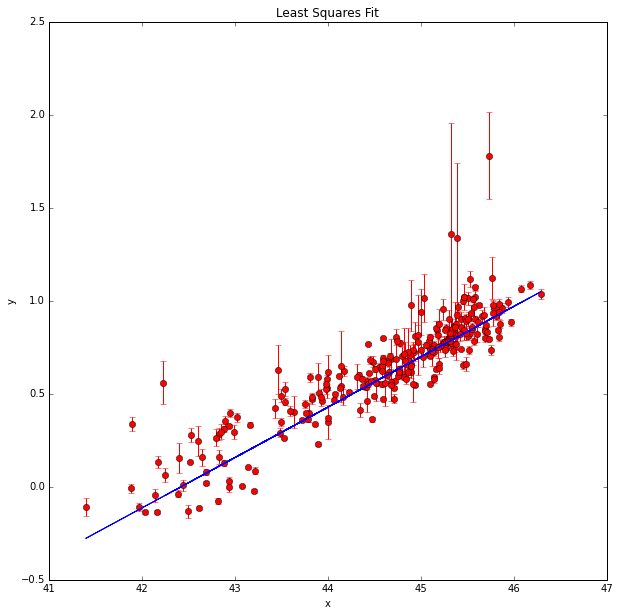

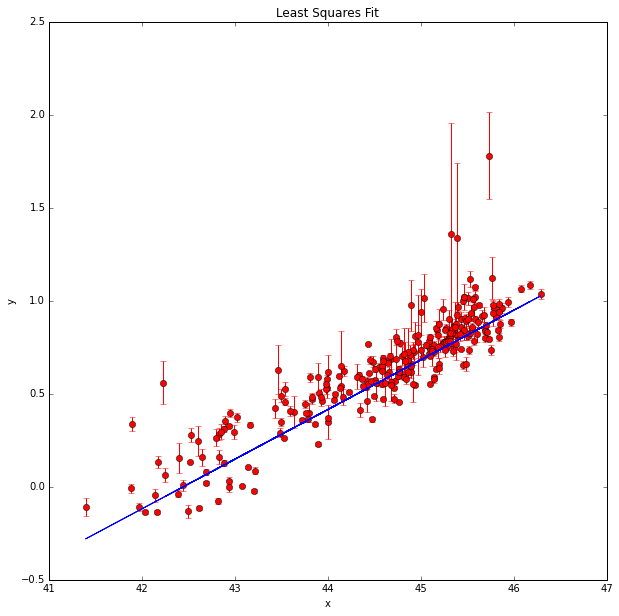

In [16]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456
"""

"""
Cordell Newmiller
Prof. Fassnacht
PHY 266
Homework 5
Problem 1

On the course smartsite, you can find a file called “lx t.dat” under 
Resources → Homework → Data. The data file contains 3 columns, 
(1) X-ray luminosity in erg/s, 
(2) X-ray temperature in keV, 
(3) error on X-ray temperature. 
First, set xi = log10(LX) and yi = log10(TX).
"""

import numpy
import CJN_Functions as my
from matplotlib import pyplot
%matplotlib inline

loadingdata=numpy.loadtxt('lx_t.dat')
data=numpy.zeros(loadingdata.shape)
data[:,0]=numpy.log10(loadingdata[:,0])   # luminosity
data[:,1]=numpy.log10(loadingdata[:,1]) # temperature
data[:,2]=loadingdata[:,2]/(loadingdata[:,1]*numpy.log(10))  
# propogate temperature error 


"""
(a) Do the fitting of a straight line to the data, y = a0 + a1x using the 
weighted version of the fitting with the curvature matrix, etc. Give your 
derived values for a0 and a1.


(b) Calculate a χ2 statistic for the fit and the reduced χ2 (i.e., χ2ν). 
State whether this is a good fit or not.
"""

# PolynomialFit is a generalized version of hw4p2, see the 
# CJN_Function file for details.
ymodel,parameters,psigmas,chisquared,reducedchisquared = (
    my.PolynomialFit(data[:,0],data[:,1],data[:,2],2,True))

"""
(c) Write your own code to calculate the bootstrap error. Give the errors 
that you calculate, via the bootstrap method, on the slope and intercept of 
your linear fit to this dataset.
"""
repeats=100

bootstraps=numpy.zeros([repeats,parameters.size])

for i in range(repeats):
    elements=numpy.random.choice(data.shape[0],repeats)  
    # N integers between 0 and N-1
    
    _,bootstraps[i,:],_,_,_=(my.PolynomialFit(data[elements,0],
                            data[elements,1],data[elements,2],2))
    

bmeans=bootstraps.mean(axis=0)
bstds=bootstraps.std(axis=0)

print("\n")
for i in range(bmeans.size):
    print("Bootstrapped a%s is %2.3f ± %2.3f" % (i, bmeans[i], bstds[i]))

"""
(d) Write your own code to calculate the jackknife estimates of the 
parameters. Give the jackknife estimate for a0 and a1.

"""
N=data.shape[0]
jackknives=numpy.zeros([N,parameters.size])

for i in range(2):
    elements= numpy.concatenate((numpy.arange(0,i),
                                 numpy.arange(i+1,N)))
    print(elements)
    _,partials,_,_,_=(my.PolynomialFit(data[elements,0],
                            data[elements,1],data[elements,2],2,True))
    print(partials)
    jackknives[i,:] = N*parameters - (N-1)*partials

jmeans=jackknives.mean(axis=0)
jstds=jackknives.std(axis=0)

print(jackknives)
for i in range(bmeans.size):
    print("Jackknived a%s is %2.3f ± %2.3f" % (i, jmeans[i], jstds[i]))
    
# End of problem 1
